In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# Connecting to the site and checking the connection

In [3]:
url = 'http://books.toscrape.com/catalogue/page-1.html'

In [4]:
print(f"Connecting to {url}...")

response = requests.get(url)

if response.status_code == 200:
    print("Connection Successful!")

    soup = BeautifulSoup(response.text, 'html.parser')

    first_book = soup.find('article', class_='product_pod')

    title = first_book.find('h3').find('a')['title']
    price = first_book.find('p', class_='price_color').text

    print("\n--- Extracted Data ---")
    print(f"Book Title: {title}")
    print(f"Price: {price}")

else:
    print("Error connecting")


Connecting to http://books.toscrape.com/catalogue/page-1.html...
Connection Successful!

--- Extracted Data ---
Book Title: A Light in the Attic
Price: Â£51.77


In [5]:
# Downloading all data and arranging the data
# in a data frame for further analysis

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

star_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

def get_single_book_data(book_url):
    try:
        response = requests.get(book_url)
        if response.status_code != 200:
            return None

        soup = BeautifulSoup(response.text, 'html.parser')

        breadcrumbs = soup.find('ul', class_='breadcrumb')
        category = breadcrumbs.find_all('li')[2].text.strip()

        title = soup.find('h1').text.strip()

        star_tag = soup.find('p', class_='star-rating')
        if star_tag:

            rating_text = star_tag['class'][1]
            rating = star_map.get(rating_text, 0)
        else:
            rating = 0

        book_info = {
            'Category': category,
            'Title': title,
            'Rating': rating,
            'Url': book_url
        }

        table = soup.find('table', class_='table table-striped')
        rows = table.find_all('tr')

        for row in rows:
            header = row.find('th').text.strip()
            value = row.find('td').text.strip()
            book_info[header] = value

        return book_info

    except Exception as e:
        print(f"Error scraping book {book_url}: {e}")
        return None

base_catalogue_url = 'http://books.toscrape.com/catalogue/page-{}.html'
base_domain = 'http://books.toscrape.com/catalogue/'

all_books_data = []
total_books_scraped = 0

print(f"Starting Full Crawl with Ratings (Pages 1-50)...")

for page_num in range(1, 51):
    url = base_catalogue_url.format(page_num)

    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        articles = soup.find_all('article', class_='product_pod')

        print(f"--- Processing Page {page_num}/50 ({len(articles)} books) ---")

        for article in articles:
            relative_url = article.find('h3').find('a')['href']
            clean_rel_url = relative_url.replace('../', '')
            full_book_url = base_domain + clean_rel_url

            if 'catalogue' not in full_book_url:
                 full_book_url = 'http://books.toscrape.com/catalogue/' + clean_rel_url

            data = get_single_book_data(full_book_url)

            if data:
                all_books_data.append(data)
                total_books_scraped += 1

                if total_books_scraped % 50 == 0:
                    print(f"   > Progress: collected {total_books_scraped} books so far...")

            time.sleep(0.1)

    except Exception as e:
        print(f"CRITICAL ERROR on page {page_num}: {e}")

df = pd.DataFrame(all_books_data)

print("\n--- Mission Complete! ---")
print(f"Total Books: {len(df)}")
print(df.head())

df.to_csv('books_data.csv', index=False)
print("Saved raw data to 'books_data.csv'")

Starting Full Crawl with Ratings (Pages 1-50)...
--- Processing Page 1/50 (20 books) ---
--- Processing Page 2/50 (20 books) ---
--- Processing Page 3/50 (20 books) ---
   > Progress: collected 50 books so far...
--- Processing Page 4/50 (20 books) ---
--- Processing Page 5/50 (20 books) ---
   > Progress: collected 100 books so far...
--- Processing Page 6/50 (20 books) ---
--- Processing Page 7/50 (20 books) ---
--- Processing Page 8/50 (20 books) ---
   > Progress: collected 150 books so far...
--- Processing Page 9/50 (20 books) ---
--- Processing Page 10/50 (20 books) ---
   > Progress: collected 200 books so far...
--- Processing Page 11/50 (20 books) ---
--- Processing Page 12/50 (20 books) ---
--- Processing Page 13/50 (20 books) ---
   > Progress: collected 250 books so far...
--- Processing Page 14/50 (20 books) ---
--- Processing Page 15/50 (20 books) ---
   > Progress: collected 300 books so far...
--- Processing Page 16/50 (20 books) ---
--- Processing Page 17/50 (20 books

In [7]:
df

,Category,Title,Rating,Url,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews
0,Poetry,A Light in the Attic,3,http://books.toscrape.com/catalogue/a-light-in...,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,In stock (22 available),0
1,Historical Fiction,Tipping the Velvet,1,http://books.toscrape.com/catalogue/tipping-th...,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,In stock (20 available),0
2,Fiction,Soumission,1,http://books.toscrape.com/catalogue/soumission...,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,In stock (20 available),0
3,Mystery,Sharp Objects,4,http://books.toscrape.com/catalogue/sharp-obje...,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,In stock (20 available),0
4,History,Sapiens: A Brief History of Humankind,5,http://books.toscrape.com/catalogue/sapiens-a-...,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,In stock (20 available),0
...,...,...,...,...,...,...,...,...,...,...,...
995,Classics,Alice in Wonderland (Alice's Adventures in Won...,1,http://books.toscrape.com/catalogue/alice-in-w...,cd2a2a70dd5d176d,Books,Â£55.53,Â£55.53,Â£0.00,In stock (1 available),0
996,Sequential Art,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,http://books.toscrape.com/catalogue/ajin-demi-...,bfd5e1701c862ac3,Books,Â£57.06,Â£57.06,Â£0.00,In stock (1 available),0
997,Historical Fiction,A Spy's Devotion (The Regency Spies of London #1),5,http://books.toscrape.com/catalogue/a-spys-dev...,19fec36a1dfb4c16,Books,Â£16.97,Â£16.97,Â£0.00,In stock (1 available),0
998,Mystery,1st to Die (Women's Murder Club #1),1,http://books.toscrape.com/catalogue/1st-to-die...,f684a82adc49f011,Books,Â£53.98,Â£53.98,Â£0.00,In stock (1 available),0


In [8]:
# General information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           1000 non-null   object
 1   Title              1000 non-null   object
 2   Rating             1000 non-null   int64 
 3   Url                1000 non-null   object
 4   UPC                1000 non-null   object
 5   Product Type       1000 non-null   object
 6   Price (excl. tax)  1000 non-null   object
 7   Price (incl. tax)  1000 non-null   object
 8   Tax                1000 non-null   object
 9   Availability       1000 non-null   object
 10  Number of reviews  1000 non-null   object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB


In [10]:
df.to_csv('books_data.csv', index=False, encoding='utf-8')

In [11]:
data = df.copy()

In [12]:
data

,Category,Title,Rating,Url,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews
0,Poetry,A Light in the Attic,3,http://books.toscrape.com/catalogue/a-light-in...,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,In stock (22 available),0
1,Historical Fiction,Tipping the Velvet,1,http://books.toscrape.com/catalogue/tipping-th...,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,In stock (20 available),0
2,Fiction,Soumission,1,http://books.toscrape.com/catalogue/soumission...,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,In stock (20 available),0
3,Mystery,Sharp Objects,4,http://books.toscrape.com/catalogue/sharp-obje...,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,In stock (20 available),0
4,History,Sapiens: A Brief History of Humankind,5,http://books.toscrape.com/catalogue/sapiens-a-...,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,In stock (20 available),0
...,...,...,...,...,...,...,...,...,...,...,...
995,Classics,Alice in Wonderland (Alice's Adventures in Won...,1,http://books.toscrape.com/catalogue/alice-in-w...,cd2a2a70dd5d176d,Books,Â£55.53,Â£55.53,Â£0.00,In stock (1 available),0
996,Sequential Art,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,http://books.toscrape.com/catalogue/ajin-demi-...,bfd5e1701c862ac3,Books,Â£57.06,Â£57.06,Â£0.00,In stock (1 available),0
997,Historical Fiction,A Spy's Devotion (The Regency Spies of London #1),5,http://books.toscrape.com/catalogue/a-spys-dev...,19fec36a1dfb4c16,Books,Â£16.97,Â£16.97,Â£0.00,In stock (1 available),0
998,Mystery,1st to Die (Women's Murder Club #1),1,http://books.toscrape.com/catalogue/1st-to-die...,f684a82adc49f011,Books,Â£53.98,Â£53.98,Â£0.00,In stock (1 available),0


In [13]:
# Data cleaning

In [14]:
data = df.drop(columns=['Url', 'UPC', 'Price (excl. tax)', 'Tax', 'Number of reviews'])

In [15]:
data.head()

,Category,Title,Rating,Product Type,Price (incl. tax),Availability
0,Poetry,A Light in the Attic,3,Books,Â£51.77,In stock (22 available)
1,Historical Fiction,Tipping the Velvet,1,Books,Â£53.74,In stock (20 available)
2,Fiction,Soumission,1,Books,Â£50.10,In stock (20 available)
3,Mystery,Sharp Objects,4,Books,Â£47.82,In stock (20 available)
4,History,Sapiens: A Brief History of Humankind,5,Books,Â£54.23,In stock (20 available)


In [16]:
data['Price'] = data['Price (incl. tax)'].str.replace('Â£', '').str.replace('£', '')

data['Price'] = pd.to_numeric(data['Price'])

data = data.drop(columns=['Price (incl. tax)'])


In [17]:
data.head()

,Category,Title,Rating,Product Type,Availability,Price
0,Poetry,A Light in the Attic,3,Books,In stock (22 available),51.77
1,Historical Fiction,Tipping the Velvet,1,Books,In stock (20 available),53.74
2,Fiction,Soumission,1,Books,In stock (20 available),50.10
3,Mystery,Sharp Objects,4,Books,In stock (20 available),47.82
4,History,Sapiens: A Brief History of Humankind,5,Books,In stock (20 available),54.23


In [18]:
temp_step = data['Availability'].str.split('(', expand=True)[1]

data['In stock'] = temp_step.str.split(' ', expand=True)[0]

data['In stock'] = pd.to_numeric(data['In stock']).fillna(0).astype(int)

data = data.drop(columns=['Availability'])

In [19]:
data.head()

,Category,Title,Rating,Product Type,Price,In stock
0,Poetry,A Light in the Attic,3,Books,51.77,22
1,Historical Fiction,Tipping the Velvet,1,Books,53.74,20
2,Fiction,Soumission,1,Books,50.10,20
3,Mystery,Sharp Objects,4,Books,47.82,20
4,History,Sapiens: A Brief History of Humankind,5,Books,54.23,20


In [20]:
# General information

In [21]:
data.head()

,Category,Title,Rating,Product Type,Price,In stock
0,Poetry,A Light in the Attic,3,Books,51.77,22
1,Historical Fiction,Tipping the Velvet,1,Books,53.74,20
2,Fiction,Soumission,1,Books,50.10,20
3,Mystery,Sharp Objects,4,Books,47.82,20
4,History,Sapiens: A Brief History of Humankind,5,Books,54.23,20


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1000 non-null   object 
 1   Title         1000 non-null   object 
 2   Rating        1000 non-null   int64  
 3   Product Type  1000 non-null   object 
 4   Price         1000 non-null   float64
 5   In stock      1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [23]:
data.describe()

,Rating,Price,In stock
count,1000.000000,1000.00000,1000.000000
mean,2.923000,35.07035,8.585000
std,1.434967,14.44669,5.654622
min,1.000000,10.00000,1.000000
25%,2.000000,22.10750,3.000000
50%,3.000000,35.98000,7.000000
75%,4.000000,47.45750,14.000000
max,5.000000,59.99000,22.000000


In [24]:
# Macro analysis

In [25]:
data['Revenue'] = data['Price'] * data['In stock']

data.head()

,Category,Title,Rating,Product Type,Price,In stock,Revenue
0,Poetry,A Light in the Attic,3,Books,51.77,22,1138.94
1,Historical Fiction,Tipping the Velvet,1,Books,53.74,20,1074.80
2,Fiction,Soumission,1,Books,50.10,20,1002.00
3,Mystery,Sharp Objects,4,Books,47.82,20,956.40
4,History,Sapiens: A Brief History of Humankind,5,Books,54.23,20,1084.60


In [26]:
# Total Inventory Value

In [27]:
Total_Inventory_Value = data['Revenue'].sum()

print(f"Total Inventory Value: £{Total_Inventory_Value:.2f}")

Total Inventory Value: £300188.27


In [28]:
# Category Dominance

In [29]:
Category_Dominance = data.groupby('Category').count()['Title'].sort_values(ascending=False)

Category_Dominance.head(10)



,Title
Category,
Default,152
Nonfiction,110
Sequential Art,75
Add a comment,67
Fiction,65
Young Adult,54
Fantasy,48
Romance,35
Mystery,32


In [49]:
category_inventory = data.groupby('Category')['In stock'].sum().sort_values(ascending=False)

print("--- Top 10 Categories by Total Inventory ---")
category_inventory.head(10)

--- Top 10 Categories by Total Inventory ---


,In stock
Category,
Default,1345
Nonfiction,975
Sequential Art,686
Fiction,588
Add a comment,516
Young Adult,464
Fantasy,372
Food and Drink,319
Mystery,290


In [31]:
# Price Distribution

In [38]:
mean_price = data['Price'].mean()
median_price = data['Price'].median()
min_price = data['Price'].min()
max_price = data['Price'].max()

In [50]:
print("Price Statistics:")
print(f"Mean Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Price Range: £{min_price} - £{max_price}")

Price Statistics:
Mean Price: £35.07
Median Price: £35.98
Price Range: £10.0 - £59.99


In [40]:
bins = [0, 20, 40, 100]
labels = ['Budget (<£20)', 'Standard (£20-£40)', 'Premium (>£40)']
data['Price_Tier'] = pd.cut(data['Price'], bins=bins, labels=labels)

In [41]:
print("\nInventory by Price Tier:")
data['Price_Tier'].value_counts(normalize=True) * 100


Inventory by Price Tier:


,proportion
Price_Tier,
Premium (>£40),40.3
Standard (£20-£40),40.1
Budget (<£20),19.6


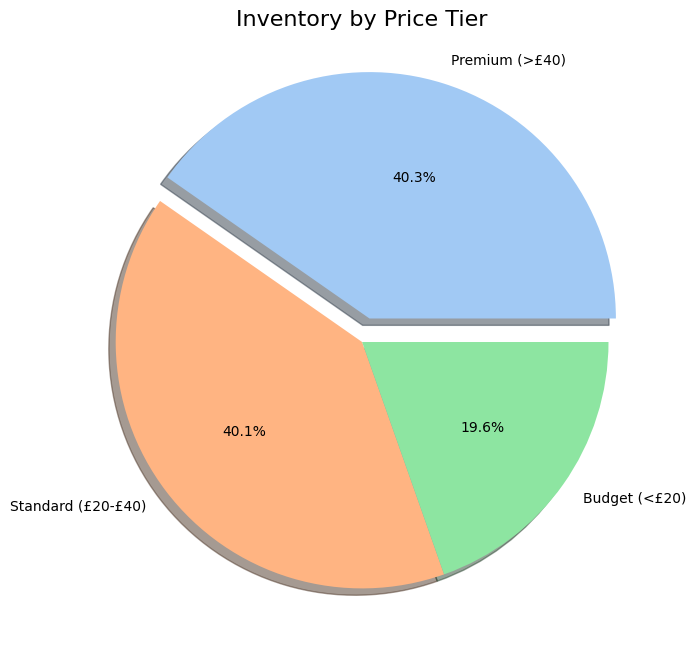

In [44]:
from numpy import exp
import matplotlib.pyplot as plt
import seaborn as sns

counts = data['Price_Tier'].value_counts()
labels = counts.index
sizes = counts.values

plt.figure(figsize=(8, 8))

colors = sns.color_palette('pastel')[0:len(labels)]


plt.pie(sizes,
        labels = labels,
        colors = colors,
        autopct = '%1.1f%%',
        explode = (0.1, 0, 0),
        shadow=True)

plt.title('Inventory by Price Tier', fontsize=16)
plt.show()

In [45]:
# Rating Analysis

In [46]:
avg_rating = data['Rating'].mean()
print(f"Average Rating: {avg_rating:.2f} / 5.0")

Average Rating: 2.92 / 5.0


In [47]:
rating_dist = data['Rating'].value_counts(normalize=True).sort_index() * 100
print("\nDetailed Distribution (%):")
rating_dist


Detailed Distribution (%):


,proportion
Rating,
1,22.6
2,19.6
3,20.3
4,17.9
5,19.6


/tmp/ipython-input-3585619309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=data, palette='coolwarm')


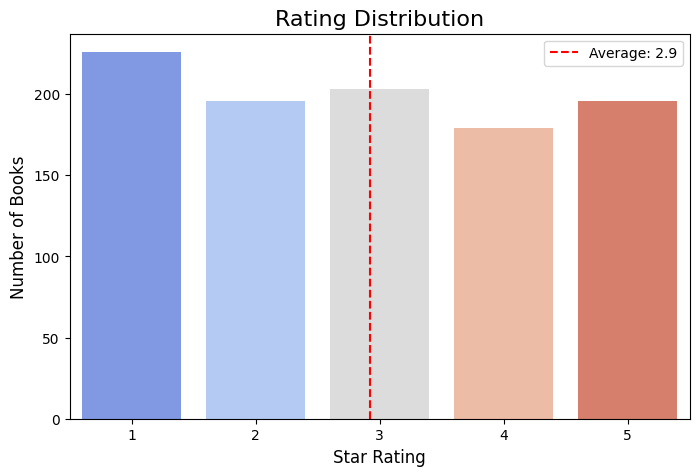

In [48]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=data, palette='coolwarm')

plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)

plt.axvline(avg_rating - 1, color='red', linestyle='--', label=f'Average: {avg_rating:.1f}')

plt.legend()
plt.show()


In [ ]:
# Macro analysis

In [61]:
# Price vs. Rating analysis -
# Do Higher Ratings Cost More?

In [55]:
rating_mean_price = data.groupby('Rating')['Price'].mean().sort_index()
print("\nPrice vs. Rating:")
rating_mean_price


Price vs. Rating:


,Price
Rating,
1,34.561195
2,34.810918
3,34.692020
4,36.093296
5,35.374490


In [56]:
correlation = data['Rating'].corr(data['Price'])
correlation

np.float64(0.028166239485873015)

In [58]:
# The averages are pretty much the same
# across all rating levels and the correlation test also produced a number that is close to 0.

# The conclusion is:
# There is NO relationship between rating and price

/tmp/ipython-input-4022629371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Price', data=data, palette='coolwarm')


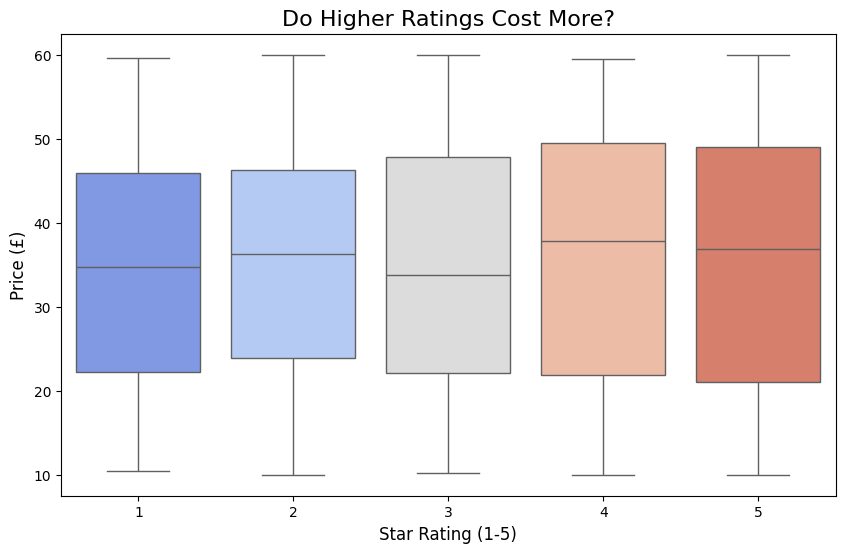

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.boxplot(x='Rating', y='Price', data=data, palette='coolwarm')

plt.title('Do Higher Ratings Cost More?', fontsize=16)
plt.xlabel('Star Rating (1-5)', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)

plt.show()

In [ ]:
# Category vs. Price

In [68]:
category_mean_price = data.groupby('Category')['Price'].mean().sort_values(ascending=False)

print("\nCategory vs. Price:")
category_mean_price.head()


Category vs. Price:


,Price
Category,
Suspense,58.330000
Novels,54.810000
Politics,53.613333
Health,51.452500
New Adult,46.383333


In [ ]:
# Inventory Levels vs. Price Analysis

In [72]:
stock_correlation = data['Price'].corr(data['In stock'])

print(f"Stock Management Correlation: {stock_correlation}")

Stock Management Correlation: -0.010914066796795583


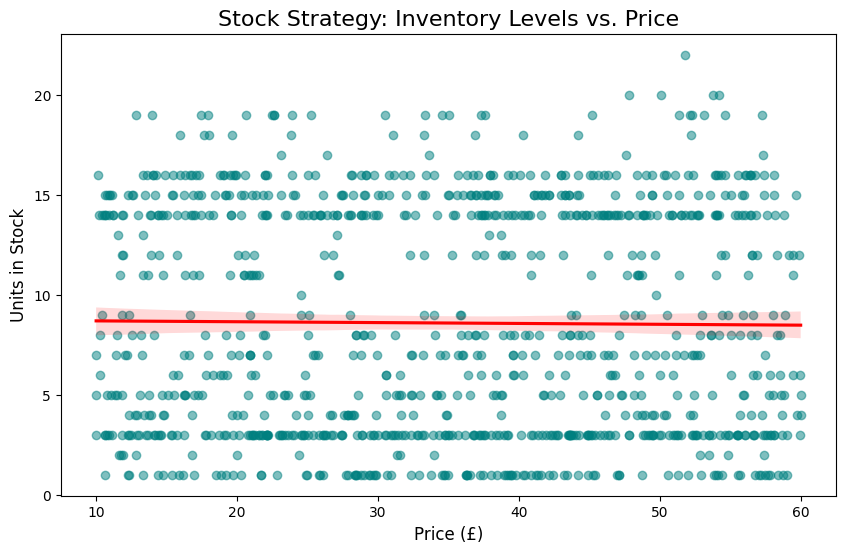

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.regplot(x='Price', y='In stock', data=data,
            scatter_kws={'alpha':0.5, 'color':'teal'},
            line_kws={'color':'red'})

plt.title('Stock Strategy: Inventory Levels vs. Price', fontsize=16)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Units in Stock', fontsize=12)

plt.show()

In [ ]:
# Identified inefficiency: The store holds equal inventory for £10 books and £60.
# Need to improve inventory management

In [ ]:
# Find diamonds and mines products

In [78]:
diamonds = data[(data['Rating'] == 5) & (data['Price'] < 20)]
mines = data[(data['Rating'] == 1) & (data['Price'] > 50)]

print(f"Found {len(diamonds)} Hidden Gems (High Rating, Low Price).")
print(f"Found {len(mines)} Potential Risks (Low Rating, High Price).")

Found 42 Hidden Gems (High Rating, Low Price).
Found 40 Potential Risks (Low Rating, High Price).


In [82]:
diamonds[['Title', 'Price', 'Rating', 'In stock']].sort_values(by='Price', ascending=False).head(5)

,Title,Price,Rating,In stock
913,The Zombie Room,19.69,5,1
662,Outlander (Outlander #1),19.67,5,4
200,Dark Notes,19.19,5,15
537,Counted With the Stars (Out from Egypt #1),17.97,5,7
553,The Hobbit (Middle-Earth Universe),17.80,5,6


In [83]:
mines[['Title', 'Price', 'Rating', 'In stock']].sort_values(by='Price', ascending=False).head(5)

,Title,Price,Rating,In stock
133,Thomas Jefferson and the Tripoli Pirates: The ...,59.64,1,15
393,The Improbability of Love,59.45,1,11
704,"Unstuffed: Decluttering Your Home, Mind, and Soul",58.09,1,3
805,"Miracles from Heaven: A Little Girl, Her Journ...",57.83,1,3
752,The Girl Who Kicked the Hornet's Nest (Millenn...,57.48,1,3


In [ ]:
# NLP Analysis -
# What areas does the store focus on?

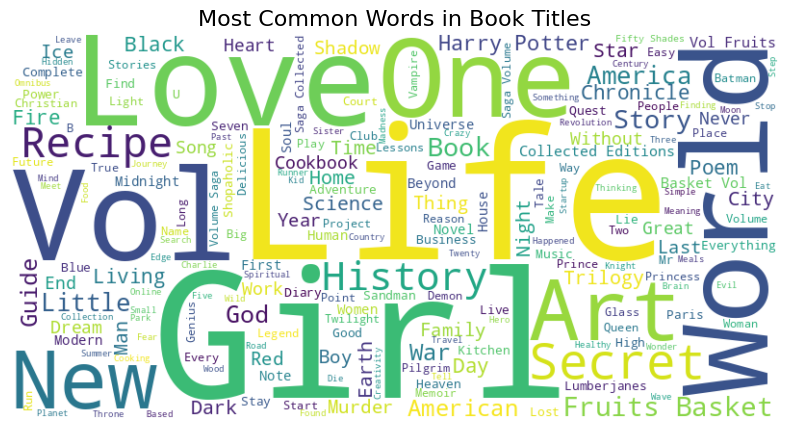

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(title for title in data['Title'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Book Titles', fontsize=16)
plt.show()

In [ ]:
# Recommendation for optimizing the store

In [88]:
original_value = (mines['Price'] * mines['In stock']).sum()
discounted_price = mines['Price'] * 0.7
recouped_cash = (discounted_price * mines['In stock']).sum()

loss = original_value - recouped_cash

print("--- Liquidation Scenario Simulation ---\n")
print(f"Current Value of 'Risk' Inventory (1-Star, High Price): £{original_value:,.2f}\n")
print(f"Cash to be generated after 30% clearance sale: £{recouped_cash:,.2f}\n")
print(f"Accounting Loss: £{loss:,.2f}\n")


--- Liquidation Scenario Simulation ---

Current Value of 'Risk' Inventory (1-Star, High Price): £18,862.71

Cash to be generated after 30% clearance sale: £13,203.90

Accounting Loss: £5,658.81



In [ ]:
# Recommendation: Execute clearance sale to free up cash flow.